# Recurrent Neural Network

In [1]:
# importing packages & libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

## Get IMdb data

In [2]:
# reading and processing data
imdb_data = pd.read_csv("./data/IMDB Dataset.csv")
imdb_data["sentiment"] = imdb_data["sentiment"].map({"positive": 1, "negative":0})

In [3]:
# defining train and test data sets
imdb_train = imdb_data["review"].values[:25000]
imdb_test = imdb_data["review"].values[25000:]

imdb_train_labels = imdb_data["sentiment"].values[:25000]
imdb_test_labels = imdb_data["sentiment"].values[25000:]

In [4]:
# checking train data
imdb_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Hyperparameters

In [5]:
# listing hyperparameters makes it easier to quickly test different combinations
# a shorter sentence than max_length it will be padded, longer sentences will be truncated
vocab_size = 10000
embedding_dim = 16
max_length = 120  

## Tokenize

In [6]:
# defining tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(imdb_train)
word_index = tokenizer.word_index

# converting words to numbers and pad for the neural network to use as input
train_sequences = tokenizer.texts_to_sequences(imdb_train)
train_padded = pad_sequences(train_sequences, maxlen=120, truncating="post")

# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(imdb_test)
test_padded = pad_sequences(testing_sequences, maxlen=120, truncating="post")

### Simple RNN

In [7]:
# creasting model
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.SimpleRNN(256),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [9]:
# training model
num_epochs = 5
history = model.fit(train_padded, imdb_train_labels, epochs=num_epochs, 
                    validation_data=(test_padded, imdb_test_labels), validation_steps=30)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.7018 - accuracy: 0.4985 - val_loss: 0.0275 - val_accuracy: 0.4646
Epoch 2/5
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.6839 - accuracy: 0.5526 - val_loss: 0.0264 - val_accuracy: 0.5615
Epoch 3/5
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.6166 - accuracy: 0.6510 - val_loss: 0.0273 - val_accuracy: 0.5479
Epoch 4/5
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.5462 - accuracy: 0.7129 - val_loss: 0.0295 - val_accuracy: 0.5490
Epoch 5/5
25000/25000 [==============================] - 41s 2ms/sample - loss: 0.4778 - accuracy: 0.7637 - val_loss: 0.0304 - val_accuracy: 0.5875


### Make predictions on text samples

In [10]:
# predicting on a positive sample
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.72785515]]


In [11]:
# predicting on a negative sample
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

[[0.5386647]]


### Plot Learning curves

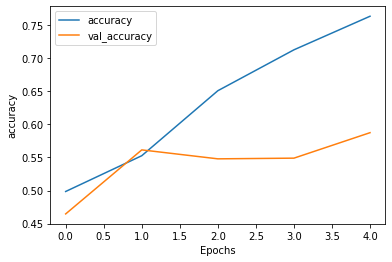

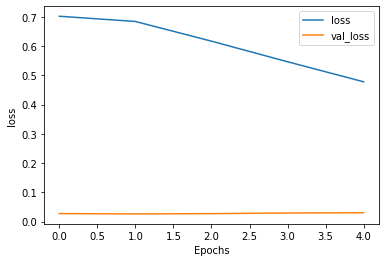

In [12]:
# defining plot function
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
             
plot_graphs(history,'accuracy')
plot_graphs(history, 'loss')

## LSTM

In [13]:
# creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 677,249
Trainable params: 677,249
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compiling model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Train the model

In [15]:
# training model
epochs_num = 5
history = model.fit(train_padded, imdb_train_labels, epochs=epochs_num,
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.5793 - accuracy: 0.6722 - val_loss: 0.0159 - val_accuracy: 0.8094
Epoch 2/5
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.3503 - accuracy: 0.8552 - val_loss: 0.0141 - val_accuracy: 0.8271
Epoch 3/5
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.2807 - accuracy: 0.8868 - val_loss: 0.0139 - val_accuracy: 0.8344
Epoch 4/5
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.2403 - accuracy: 0.9076 - val_loss: 0.0163 - val_accuracy: 0.8177
Epoch 5/5
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.2123 - accuracy: 0.9182 - val_loss: 0.0151 - val_accuracy: 0.8250


### Make predictions on text samples

In [16]:
# predicting on a positive sample
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.58711165]]


In [17]:
# predicting on a negative sample
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

[[0.2192862]]


### Plot learning curves

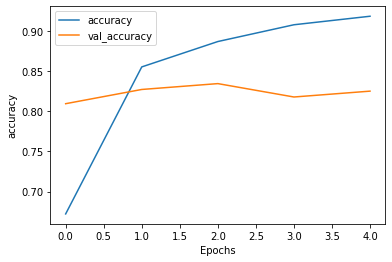

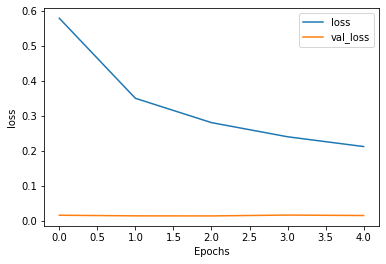

In [18]:
# plotting loss and accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Experimenting the LSTM model

In [19]:
# creating reviews
positive_review = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
negative_review = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]

### Test your models on the positive review

In [20]:
# predicting on a positive review
train_sequences = tokenizer.texts_to_sequences(positive_review)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.58711165]]


### Test your models on the negative review

In [21]:
# predicting on a negative review
train_sequences = tokenizer.texts_to_sequences(negative_review)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.2192862]]
